In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
def ax_line_attribute_setter(ax_index, marker_index, line_index, marker,
                             markeredgecolor,marker_fill_color, markersize,
                             linewidth, color, linestyle):
    """docstrings to add"""
    axes[ax_index].get_lines()[marker_index].set_marker(marker)
    axes[ax_index].get_lines()[marker_index].set_markerfacecolor(marker_fill_color)
    axes[ax_index].get_lines()[marker_index].set_markeredgecolor(markeredgecolor)
    axes[ax_index].get_lines()[marker_index].set_markersize(markersize)
    axes[ax_index].get_lines()[line_index].set_linewidth(linewidth)
    axes[ax_index].get_lines()[line_index].set_color(color)
    axes[ax_index].get_lines()[line_index].set_linestyle(linestyle)


In [3]:
data = pd.read_csv("real_estate_PML.csv", sep = ",")
data = data.drop(columns="type_l")
df = data.set_index("ville").copy()
containers = [0,20,40,80,160,df['surface_m2'].max()]
df['largeur'] = pd.cut(df['surface_m2'], containers, labels = ['Très Petit', 'Petit', 'Moyen', 'Grand', 'Très Grand' ])
df_paris = df[df.index == 'Paris'].copy()
df_paris.describe()

,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2
count,2921.000000,2921.000000,2921.000000,2921.000000,2.921000e+03,2921.000000
mean,13.765491,2.947963,1.508388,69.240381,8.919190e+05,12271.282438
std,4.810390,1.484404,1.176255,48.125717,8.947860e+05,3933.846575
min,2.000000,0.000000,0.000000,6.000000,6.000000e+04,2294.000000
25%,11.000000,2.000000,1.000000,38.600000,4.180000e+05,9983.000000
50%,15.000000,3.000000,1.000000,58.420000,6.400000e+05,11437.000000
75%,18.000000,4.000000,2.000000,86.000000,1.030000e+06,13626.000000
max,20.000000,11.000000,6.000000,427.600000,1.400000e+07,46005.000000


In [4]:
q1_pmc, q2_pmc, q3_pmc, q4_pmc = df_paris['prix_m2'].quantile([0.25, 0.5, 0.75, 1])
q1_prix, q2_prix, q3_prix, q4_prix = df_paris['prix'].quantile([0.25, 0.5, 0.75, 1])
iqr_pmc = q3_pmc - q1_pmc
iqr_prix = q3_prix - q1_prix
lower_prix = q1_prix- 3*iqr_prix
upper_prix = q3_prix + 3*iqr_prix
lower_pmc = q1_pmc - 3*iqr_pmc
upper_pmc = q3_pmc + 3*iqr_pmc

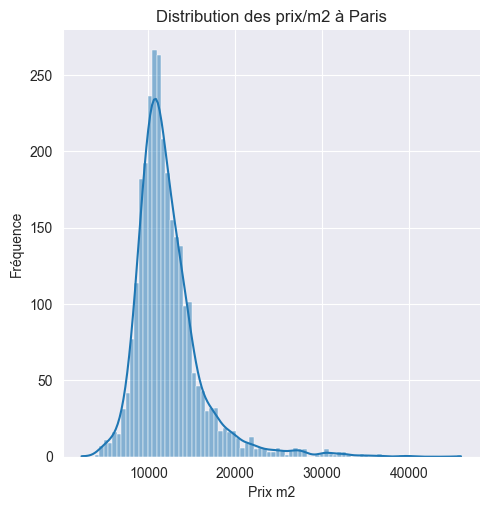

In [5]:
sns.set_style("darkgrid")
sns.displot(kind = 'hist', data = df_paris, x = 'prix_m2', kde = True)
plt.xlabel("Prix m2")
plt.ylabel("Fréquence")
plt.title("Distribution des prix/m2 à Paris")
plt.show()

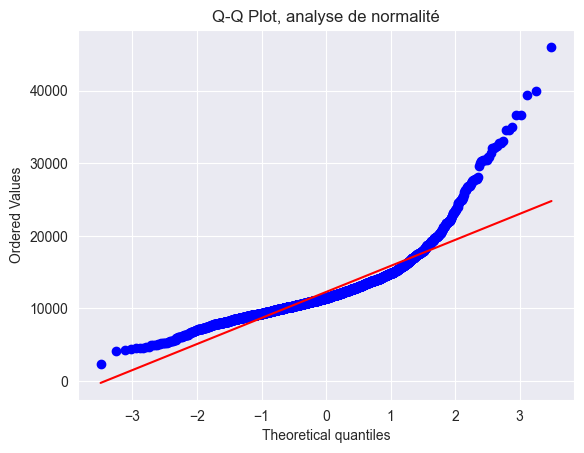

In [6]:
sns.set_style("darkgrid")
st.probplot(df_paris['prix_m2'], dist='norm', plot = plt)
plt.title('Q-Q Plot, analyse de normalité')
plt.show()

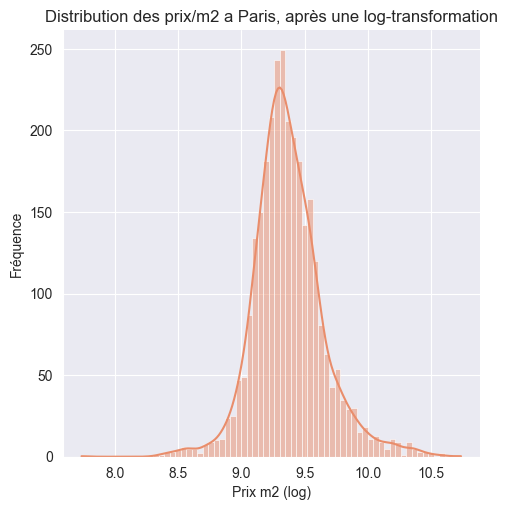

In [7]:
df_paris['prix_m2_log'] = np.log(df_paris['prix_m2'])
palette = sns.color_palette("flare")
sns.set_palette(palette)
sns.displot(kind = 'hist', data = df_paris, x = 'prix_m2_log', kde = True)
plt.xlabel("Prix m2 (log)")
plt.ylabel("Fréquence")
plt.title("Distribution des prix/m2 a Paris, après une log-transformation")
plt.show()

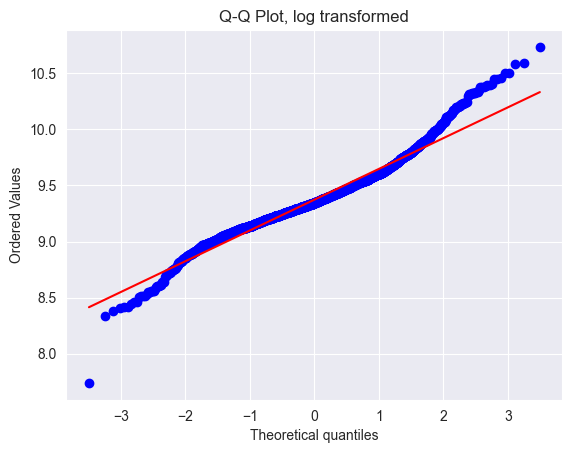

In [8]:
sns.set_style("darkgrid")
st.probplot(df_paris['prix_m2_log'], dist='norm', plot=plt)
plt.title('Q-Q Plot, log transformed')
plt.show()

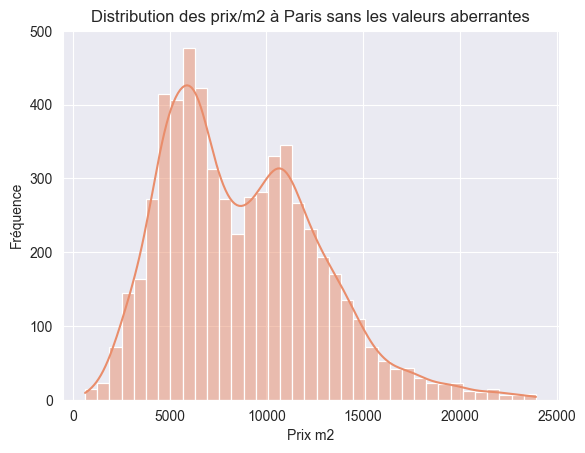

In [9]:
norm_mask = (df['prix_m2']>lower_pmc) & (df['prix_m2']<upper_pmc)
prix_m2_no_outliers = df.loc[norm_mask, 'prix_m2']
sns.set_style("darkgrid")
sns.histplot(data = prix_m2_no_outliers, kde = True)
plt.xlabel("Prix m2")
plt.ylabel("Fréquence")
plt.title("Distribution des prix/m2 à Paris sans les valeurs aberrantes")
plt.show()

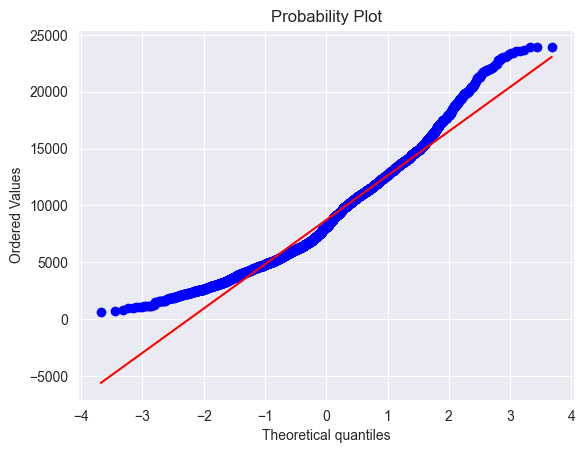

In [10]:
sns.set_style("darkgrid")
st.probplot(prix_m2_no_outliers, dist='norm',plot=plt)
plt.show()

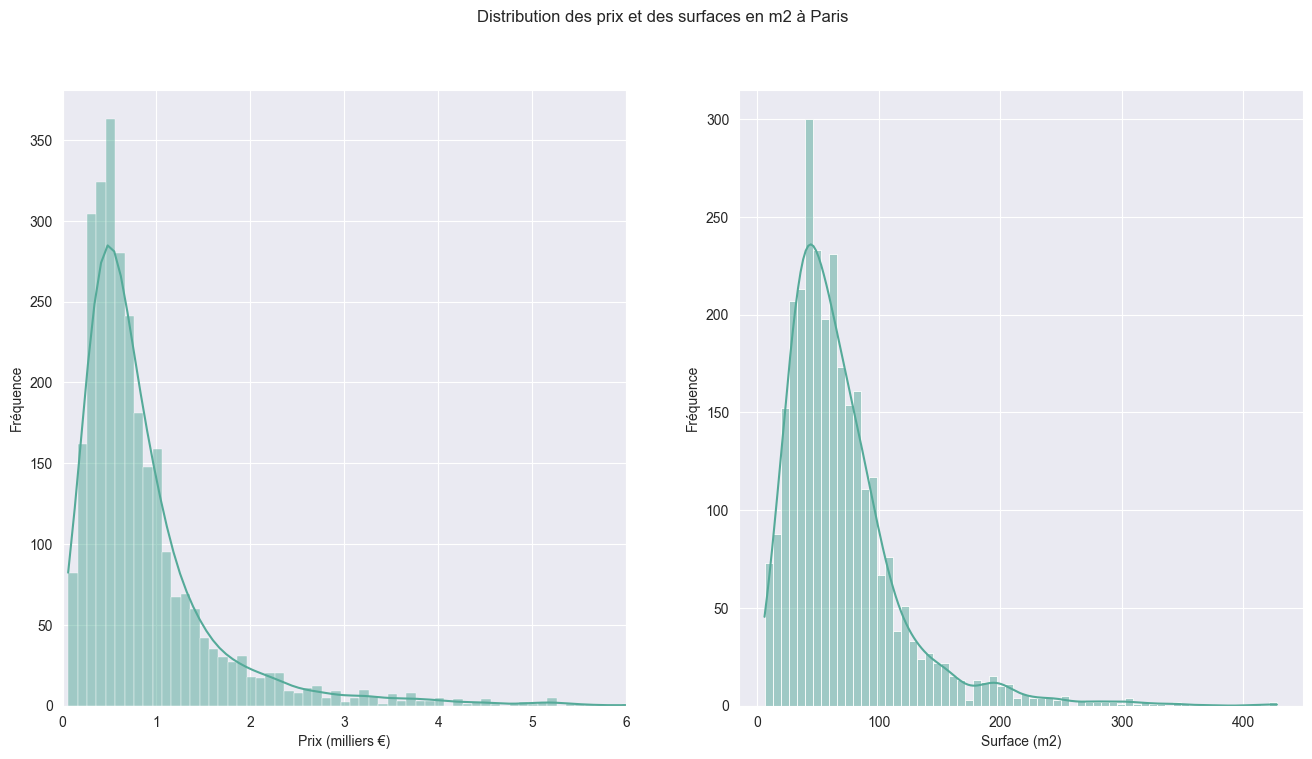

In [20]:
sns.set_style('darkgrid')
sns.set_palette(palette=sns.color_palette("dark:#5A9_r", as_cmap=False))
df_paris['prix_mil_euros'] = df_paris['prix']/1e6
fig, axes = plt.subplots(ncols=2, figsize=(16,8))
sns.histplot(data=df_paris, x='prix_mil_euros', binwidth=0.1, kde = True, ax = axes[0])
axes[0].set(xlabel='Prix (milliers €)', ylabel='Fréquence')
axes[0].set_xlim(0,6)
sns.histplot(data=df_paris, x='surface_m2', kde=True, ax = axes[1])
axes[1].set(xlabel='Surface (m2)', ylabel='Fréquence')
plt.suptitle('Distribution des prix et des surfaces en m2 à Paris')
plt.show()

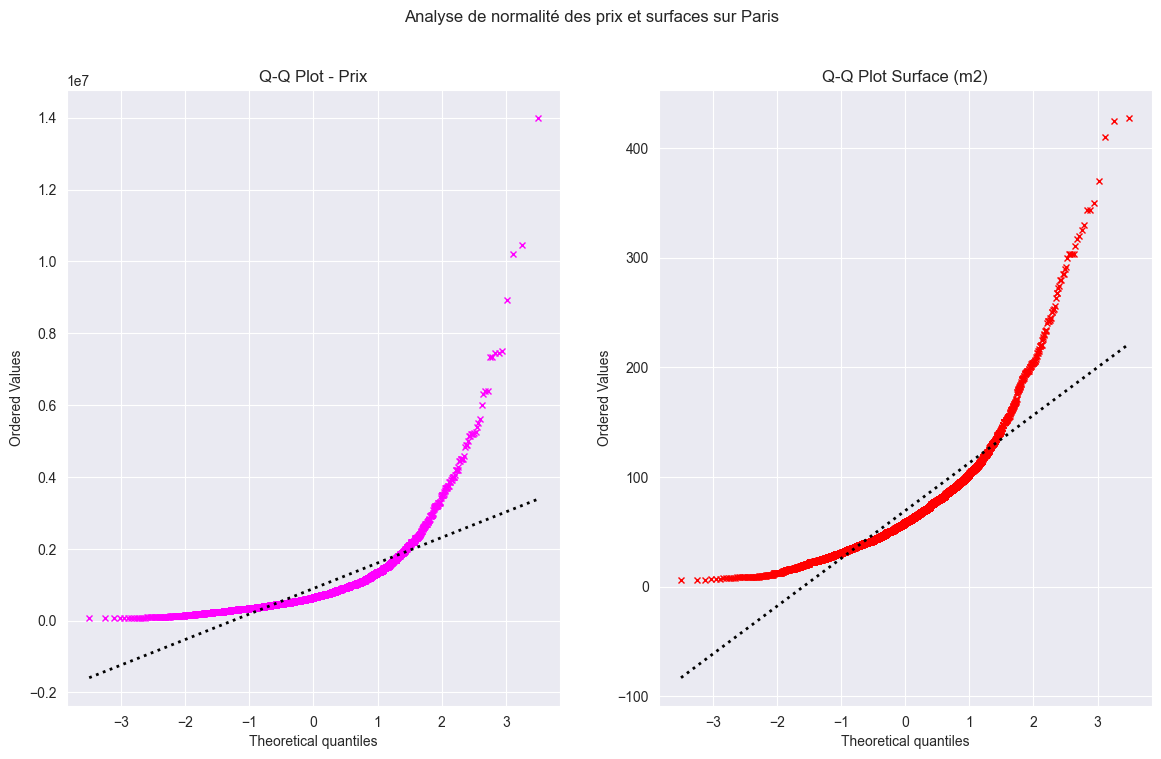

In [11]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols = 2, figsize=(14,8))
st.probplot(df_paris['prix'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité des prix et surfaces sur Paris")
axes[0].set_title("Q-Q Plot - Prix")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='magenta',
                         marker_fill_color='magenta', markersize=5,
                         linewidth=2, color='black', linestyle='dotted')
st.probplot(df_paris['surface_m2'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot Surface (m2)")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1,
                         marker='x', markeredgecolor='red',
                         marker_fill_color='red',markersize=5,
                         linewidth=2, color='black', linestyle='dotted')
plt.show()

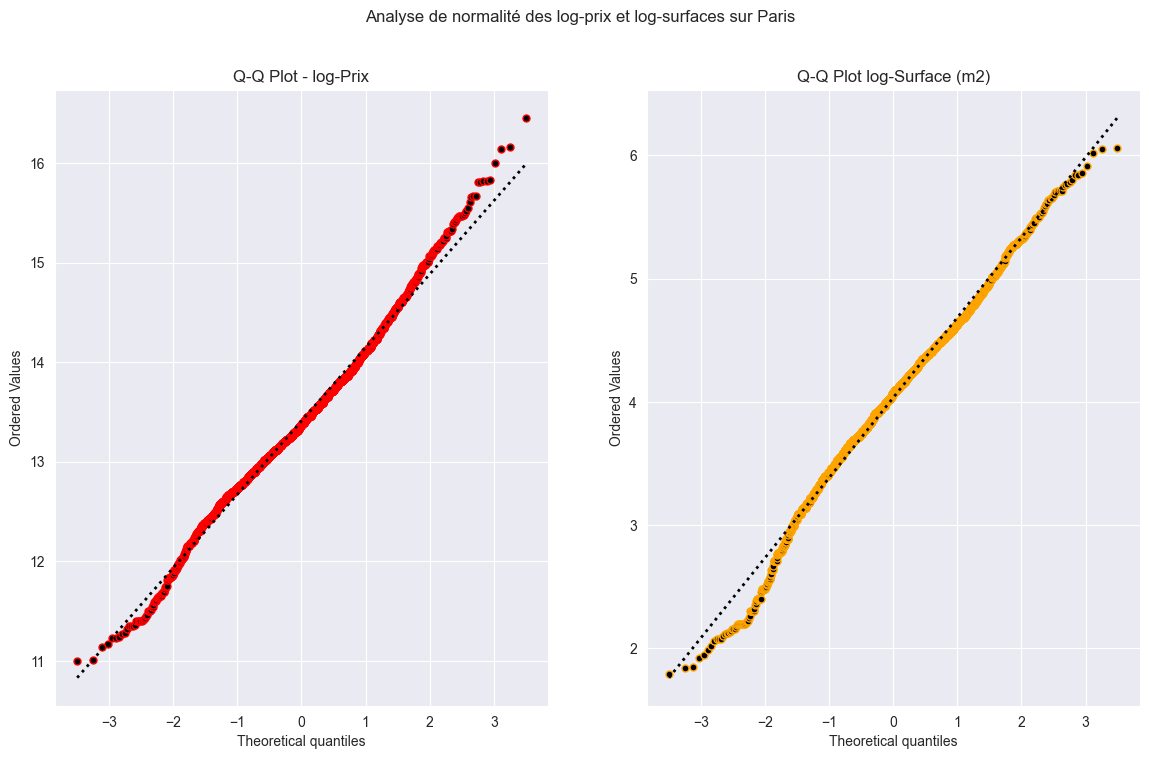

In [14]:
df_paris['log_prix'], df_paris['log_surface'] = np.log(df_paris['prix']), np.log(df_paris['surface_m2'])
sns.set_style("darkgrid")
fig, axes = plt.subplots(ncols = 2, figsize=(14,8))
st.probplot(df_paris['log_prix'], dist='norm', plot=axes[0])
plt.suptitle("Analyse de normalité des log-prix et log-surfaces sur Paris")
axes[0].set_title("Q-Q Plot - log-Prix")
ax_line_attribute_setter(ax_index=0, marker_index=0, line_index=1, marker='o',
                         marker_fill_color='black', markeredgecolor='red',
                         markersize=5, linewidth=2, color='black', linestyle='dotted')
st.probplot(df_paris['log_surface'], dist='norm', plot=axes[1])
axes[1].set_title("Q-Q Plot log-Surface (m2)")
ax_line_attribute_setter(ax_index=1, marker_index=0, line_index=1, marker='o',
                         markeredgecolor='orange', markersize=5, linewidth=2,
                         marker_fill_color='black', color='black', linestyle='dotted')
plt.show()

In [21]:
df_paris.head()

,arr,n_pieces,n_chambres,surface_m2,prix,prix_m2,largeur,prix_m2_log,log_prix,log_surface,prix_mil_euros
ville,,,,,,,,,,,
Paris,17,3.0,1.0,51.84,535000.0,10320.0,Moyen,9.241839,13.190022,3.948162,0.535
Paris,15,3.0,2.0,40.77,470000.0,11528.0,Moyen,9.352534,13.060488,3.707947,0.470
Paris,13,2.0,1.0,39.00,385000.0,9871.0,Petit,9.197356,12.860999,3.663562,0.385
Paris,13,2.0,1.0,36.03,383000.0,10630.0,Petit,9.271435,12.855790,3.584352,0.383
Paris,10,2.0,1.0,40.70,399000.0,9803.0,Moyen,9.190444,12.896717,3.706228,0.399


TypeError: KDE.__init__() got an unexpected keyword argument 'color'

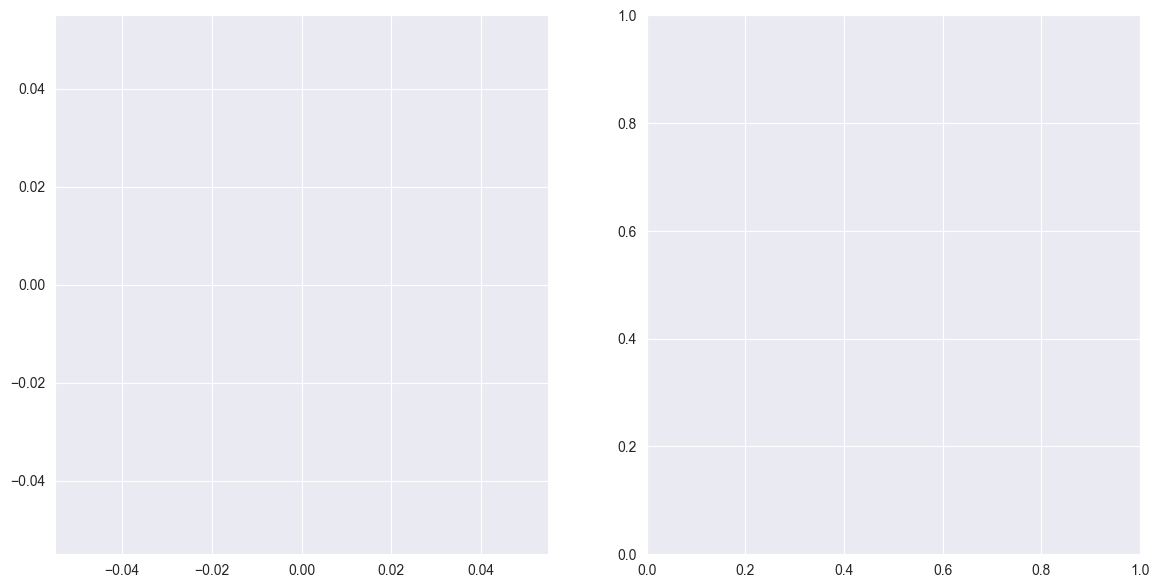

In [38]:
sns.set_style('darkgrid')
sns.set_palette("dark")
fig, axs = plt.subplots(ncols=2, figsize=(14,7))
sns.histplot(data = df_paris, x = 'n_pieces', ax = axs[0], discrete=True, kde=True, kde_kws={'bw_adjust':2, 'color':'red'})
sns.histplot(data = df_paris, x = 'n_chambres', ax = axs[1], discrete=True)